In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import equinox as eqx
import diffrax as dfx
import seaborn as sns
import numpy as np

sns.set_theme(style="darkgrid")
palette = "viridis"
sns.set_palette(palette)

In [3]:
time_of_approach = np.load("time_approaches.npy")
values = np.load("values.npy")
dist_error = np.load("dist_errors.npy")

In [4]:
print(time_of_approach.shape)
print(values.shape)
print(dist_error.shape)

(3, 100)
(3, 1000)
(3, 100)


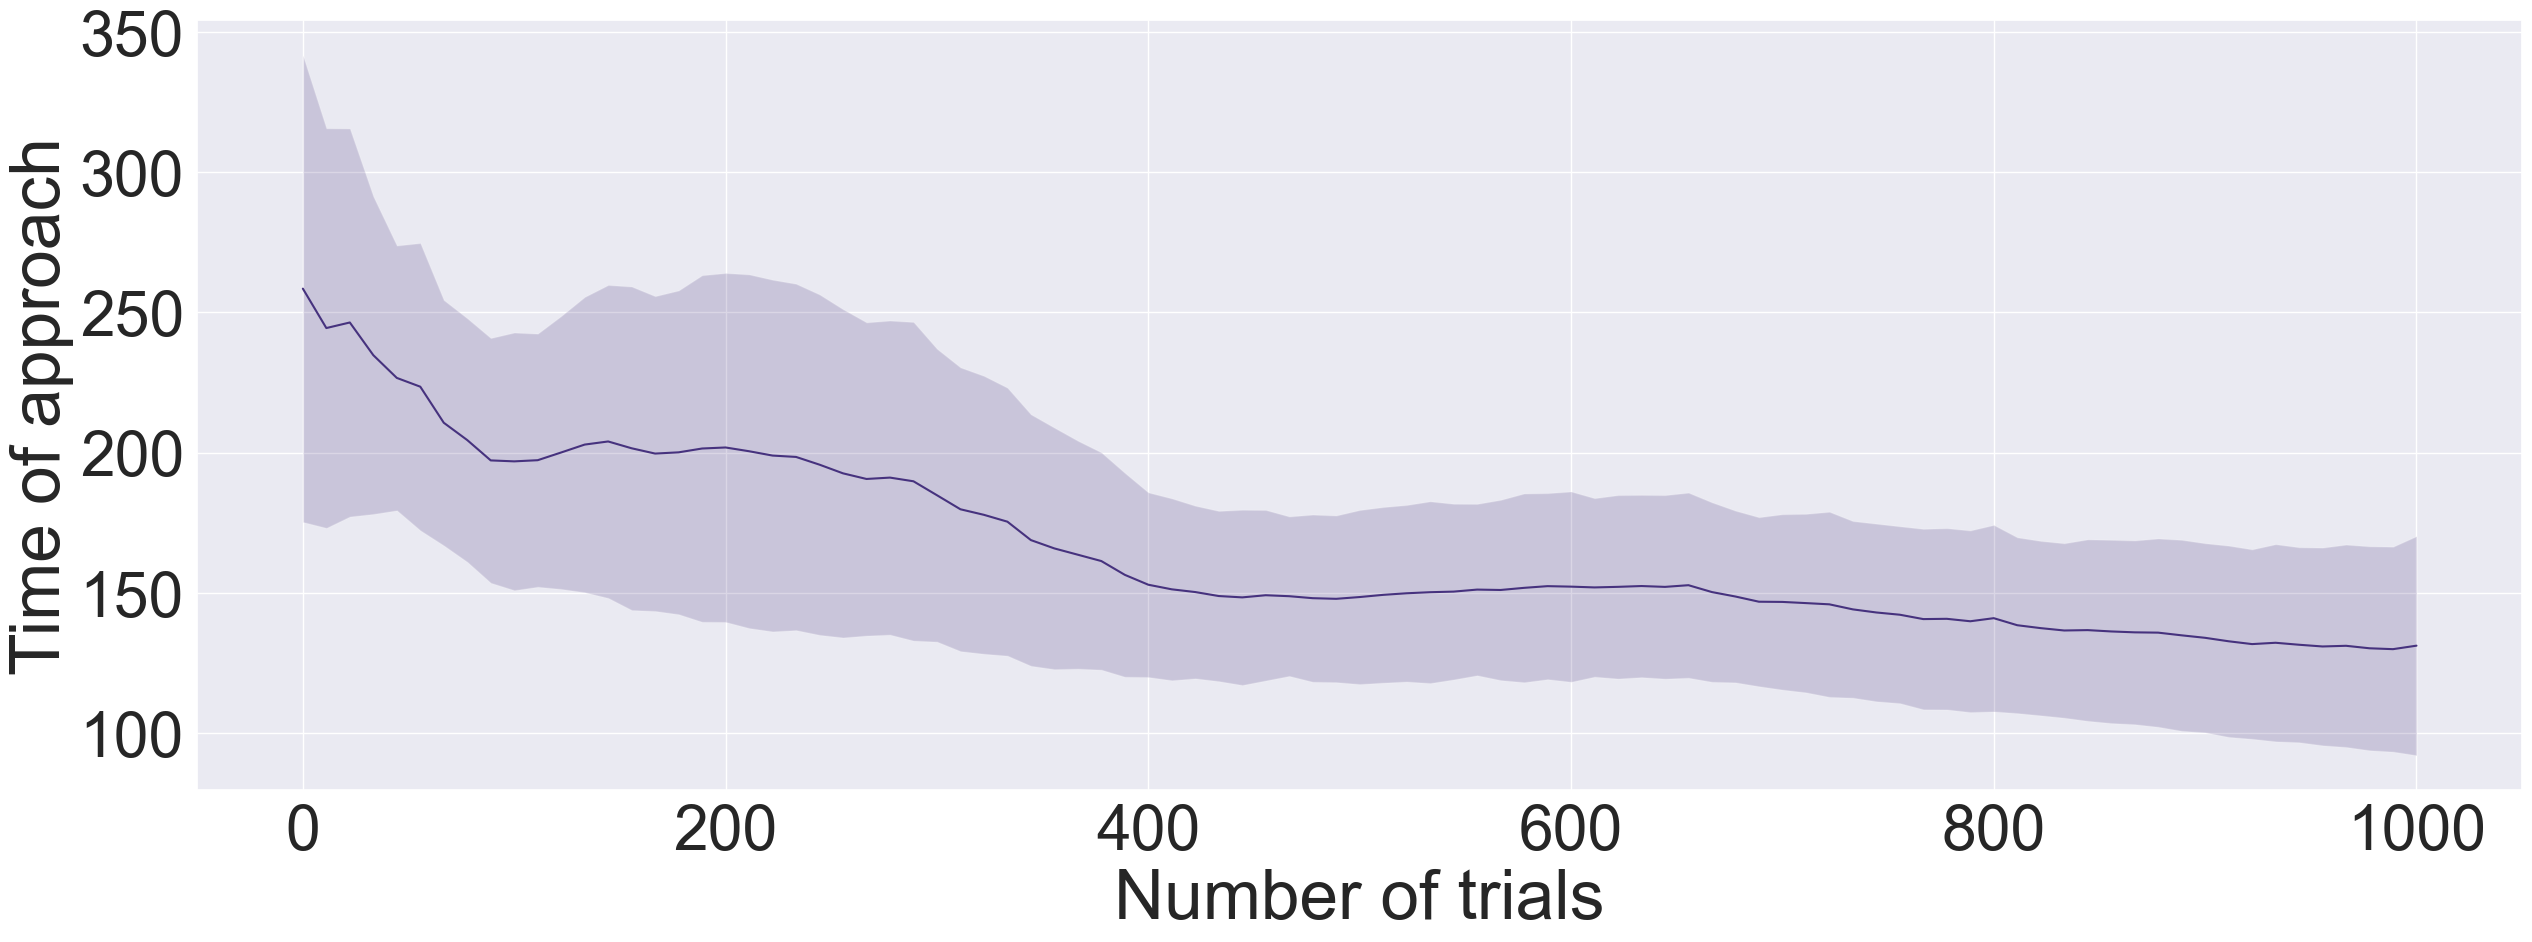

In [5]:
x = np.linspace(0, 1000, 91)
y1_mean = np.mean(time_of_approach, axis=0)
y1_smooth = np.convolve(y1_mean, np.ones(10)/10, mode='valid')
y1_std = np.std(time_of_approach, axis=0)
y1_std = np.convolve(y1_std, np.ones(10)/10, mode='valid')
fig, ax = plt.subplots(figsize=(30,10))
ax.plot(x, y1_smooth, label="time of approach")
ax.fill_between(x, y1_smooth - y1_std, y1_smooth + y1_std, alpha=0.2)
ax.set_xlabel('Number of trials', fontsize=50)
ax.set_ylabel('Time of approach', fontsize=50)
#set xticks and yticks size
ax.tick_params(axis='x', labelsize=45)
ax.tick_params(axis='y', labelsize=45)
plt.savefig('time_of_approach.svg', format='svg', bbox_inches='tight')
plt.show()

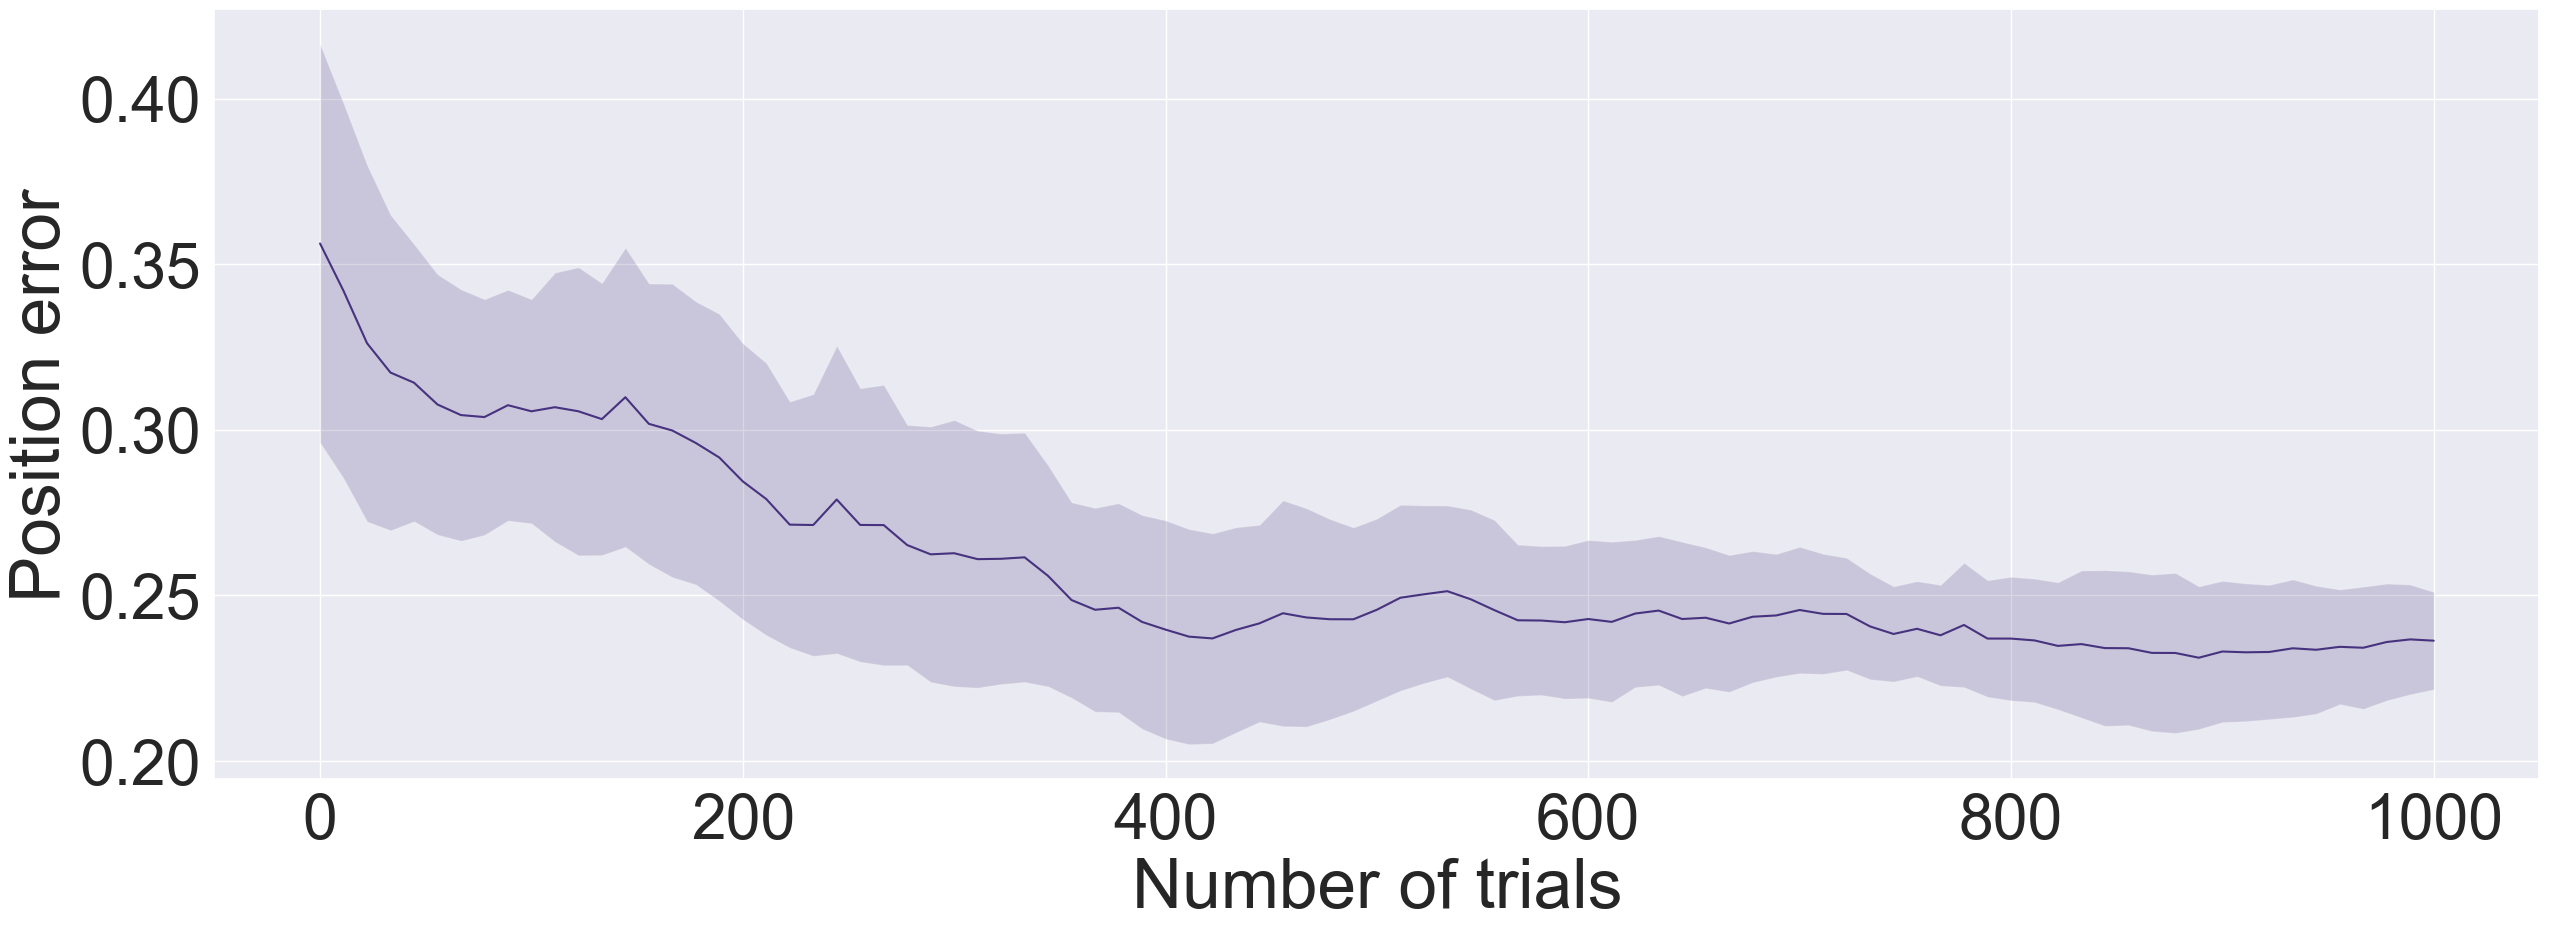

In [6]:
y2_mean = np.mean(dist_error, axis=0)
y2_smooth = np.convolve(y2_mean, np.ones(10)/10, mode='valid')
y2_std = np.std(dist_error, axis=0)
y2_std = np.convolve(y2_std, np.ones(10)/10, mode='valid')
fig, ax = plt.subplots(figsize=(30,10))
ax.fill_between(x, y2_smooth - y2_std, y2_smooth + y2_std, alpha=0.2)
ax.plot(x, y2_smooth, label="distance error")
ax.set_xlabel('Number of trials', fontsize=50)
ax.set_ylabel('Position error', fontsize=50)
#set xticks and yticks size
ax.tick_params(axis='x', labelsize=45)
ax.tick_params(axis='y', labelsize=45)
plt.savefig('Distance_error.svg', format='svg', bbox_inches='tight')
plt.show()

